In [ ]:
##Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
import pydotplus
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [93]:
data = pd.read_csv(r"C:\Users\Pratik Shetty\Downloads\archive (3)\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
##EDA 

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
X = data.drop("Outcome",axis=1)
y = data["Outcome"]

In [97]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [98]:
scaled_df = pd.DataFrame(scaled_data,columns = X.columns)

In [99]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [100]:
variables = scaled_df
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [101]:
vif

,VIF,Features
0,1.430872,Pregnancies
1,1.298961,Glucose
2,1.181863,BloodPressure
3,1.507432,SkinThickness
4,1.427536,Insulin
5,1.297450,BMI
6,1.067090,DiabetesPedigreeFunction
7,1.588368,Age


In [ ]:
## since variance is not greater then 5  As per Vif we don't need to remove the features

<Axes: >

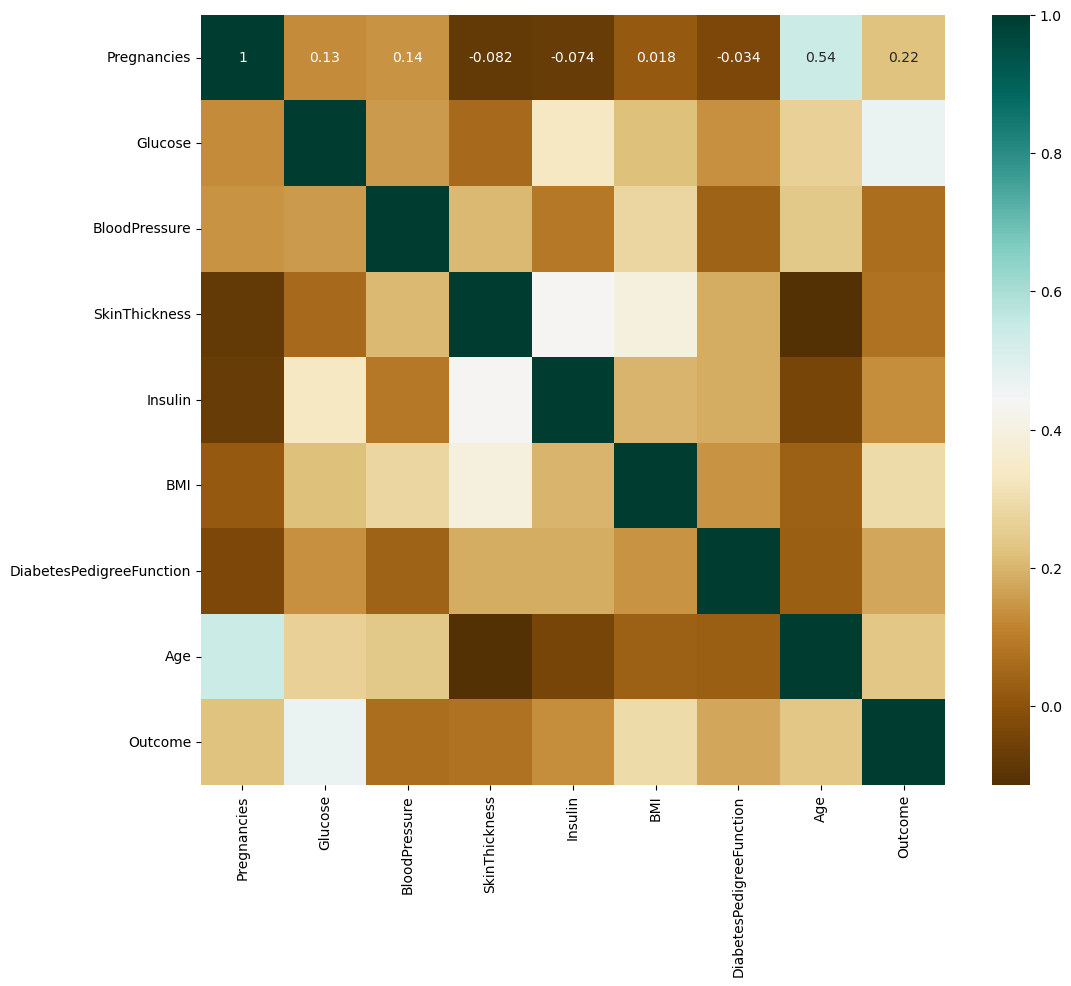

In [103]:
plt.figure(figsize=(12,10))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot = True)

In [ ]:
## As per heatmap,the Pregnancies feaures correlation is greater then 0.90 but we can't remove that as age is also important  featuresas & influence for target variavble(heart diseases prediction) & as per healthcare domain.So,other features have values are below 0.90 & -0.90 we will not remove that.Therefore all features are important as per heatmap & VIF.. 

In [104]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

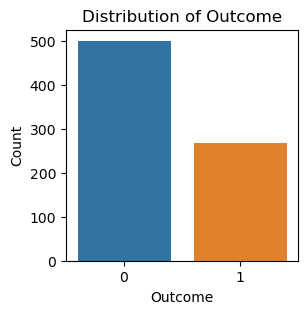

In [105]:
plt.figure(figsize=(3,3))
sns.countplot(data=data,x = "Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Outcome")
plt.show()

<Axes: xlabel='Outcome'>

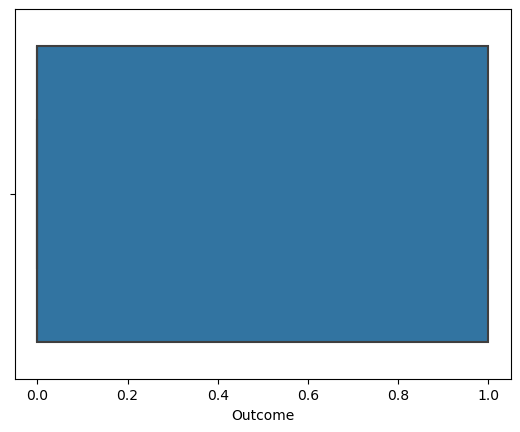

In [106]:
sns.boxplot(data=data,x = "Outcome")

In [107]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


# Generating an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

# Creating a DataFrame
data = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'class': y})

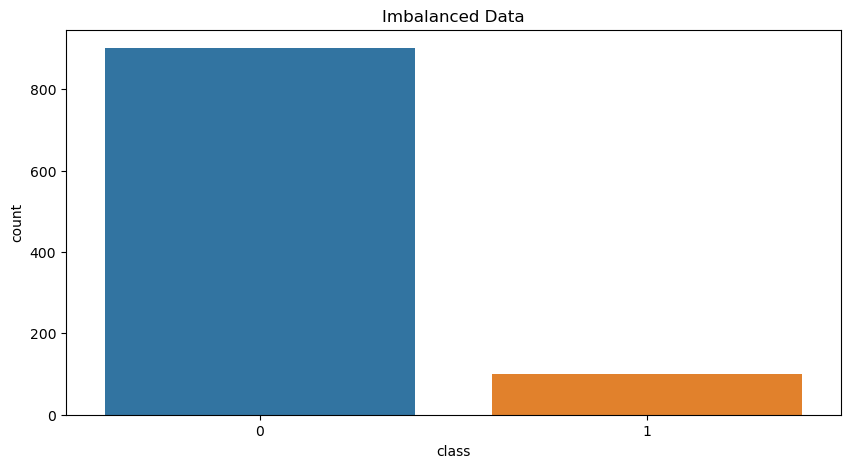

In [108]:
# Plotting the imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=data)
plt.title('Imbalanced Data')
plt.show()

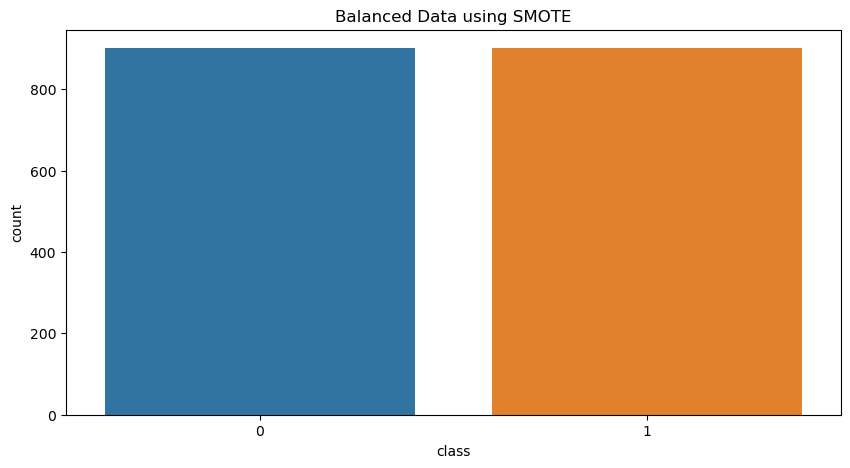

In [109]:
# Applying SMOTE to balance the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
data_res = pd.DataFrame({'feature1': X_res[:, 0], 'feature2': X_res[:, 1], 'class': y_res})

# Plotting the balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=data_res)
plt.title('Balanced Data using SMOTE')
plt.show()

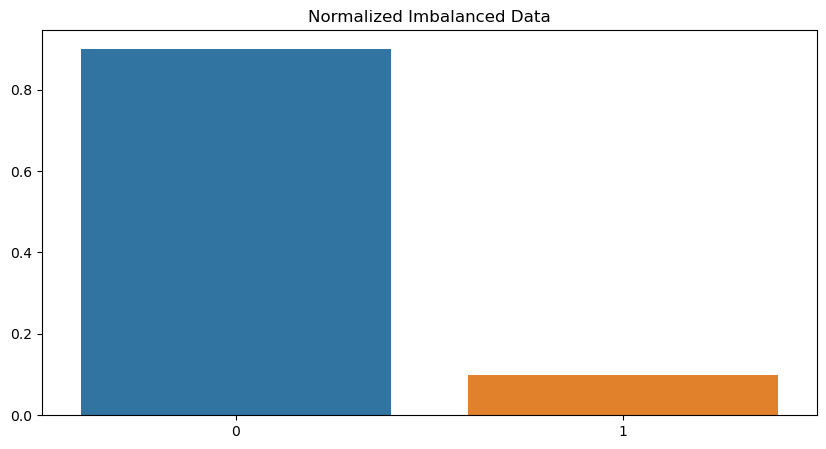

In [110]:
# Normalizing the original imbalanced data
class_counts = data['class'].value_counts(normalize=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Normalized Imbalanced Data')
plt.show()

In [111]:
## Logistic alogrithms 

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [115]:
y_pred = model.predict(X_test)

In [116]:
Accuracy = accuracy_score(y_test,y_pred)
Confusion_mat = confusion_matrix(y_test,y_pred)
Classification_rep = classification_report(y_test,y_pred)

print(f"Accuracy:{Accuracy:.2f}")
print("Confusion_mat:\n",Confusion_mat)
print("Classification Report:\n",Classification_rep)

Accuracy:0.99
Confusion_mat:
 [[182   0]
 [  2  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       182
           1       1.00      0.89      0.94        18

    accuracy                           0.99       200
   macro avg       0.99      0.94      0.97       200
weighted avg       0.99      0.99      0.99       200



In [117]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [118]:
Auc_score = roc_auc_score(y_test,y_pred_prob)
fpr,tpr,_ = roc_curve(y_test,y_pred_prob)

<function matplotlib.pyplot.show(close=None, block=None)>

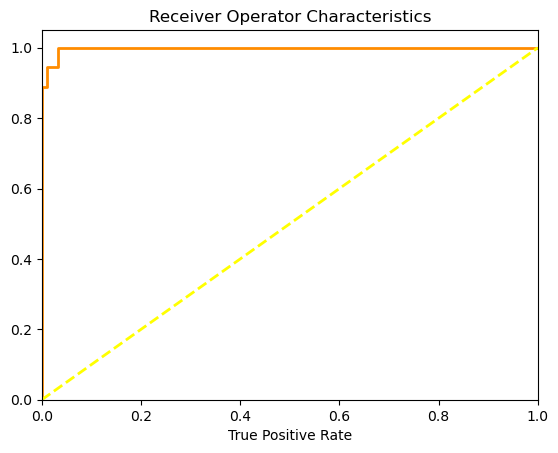

In [119]:
plt.figure()
plt.plot(fpr,tpr,color="DarkOrange",lw=2,label=f"Roc(Auc=:{Auc_score}")
plt.plot([0,1],[0,1],color="Yellow",lw=2,linestyle="--")
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.show

In [120]:
## Random Forest Classifier Alogrithms

In [121]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
y_pred = rf_clf.predict(X_test)

In [123]:
rf_accuracy= metrics.accuracy_score(y_test,y_pred)
rf_precision = metrics.precision_score(y_test,y_pred,average="weighted")
rf_f1_score = metrics.f1_score(y_test,y_pred,average="weighted")
rf_recall = metrics.recall_score(y_test,y_pred,average="weighted")


print(f"Accuracy of random forest:{rf_accuracy:.2f}")
print(f"Precision of random forest:{rf_precision:.2f}")
print(f"Recall of random forest:{rf_recall:.2f}")
print(f"F1 Score of random Forest:{rf_f1_score:.2f}")

Accuracy of random forest:0.98
Precision of random forest:0.98
Recall of random forest:0.98
F1 Score of random Forest:0.98


In [124]:
## Gradient Boosting Classifier Alogrithms

In [125]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [126]:
y_pred = model.predict(X_test)

In [127]:
gb_accuracy = metrics.accuracy_score(y_test,y_pred)
gb_precision = metrics.precision_score(y_test,y_pred,average="weighted")
gb_recall = metrics.recall_score(y_test,y_pred,average="weighted")
gb_f1_score = metrics.f1_score(y_test,y_pred,average="weighted")


print(f"Accuracy of gradient boostinng:{gb_accuracy:.2f}")
print(f"Precision of gradient boosting:{gb_precision:.2f}")
print(f"Recall of gradient boosting:{gb_recall:.2f}")
print(f"F1_score of gradient boosting:{gb_recall:.2f}")

Accuracy of gradient boostinng:0.99
Precision of gradient boosting:0.99
Recall of gradient boosting:0.99
F1_score of gradient boosting:0.99


In [128]:
## decision tree alogrithms

In [129]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

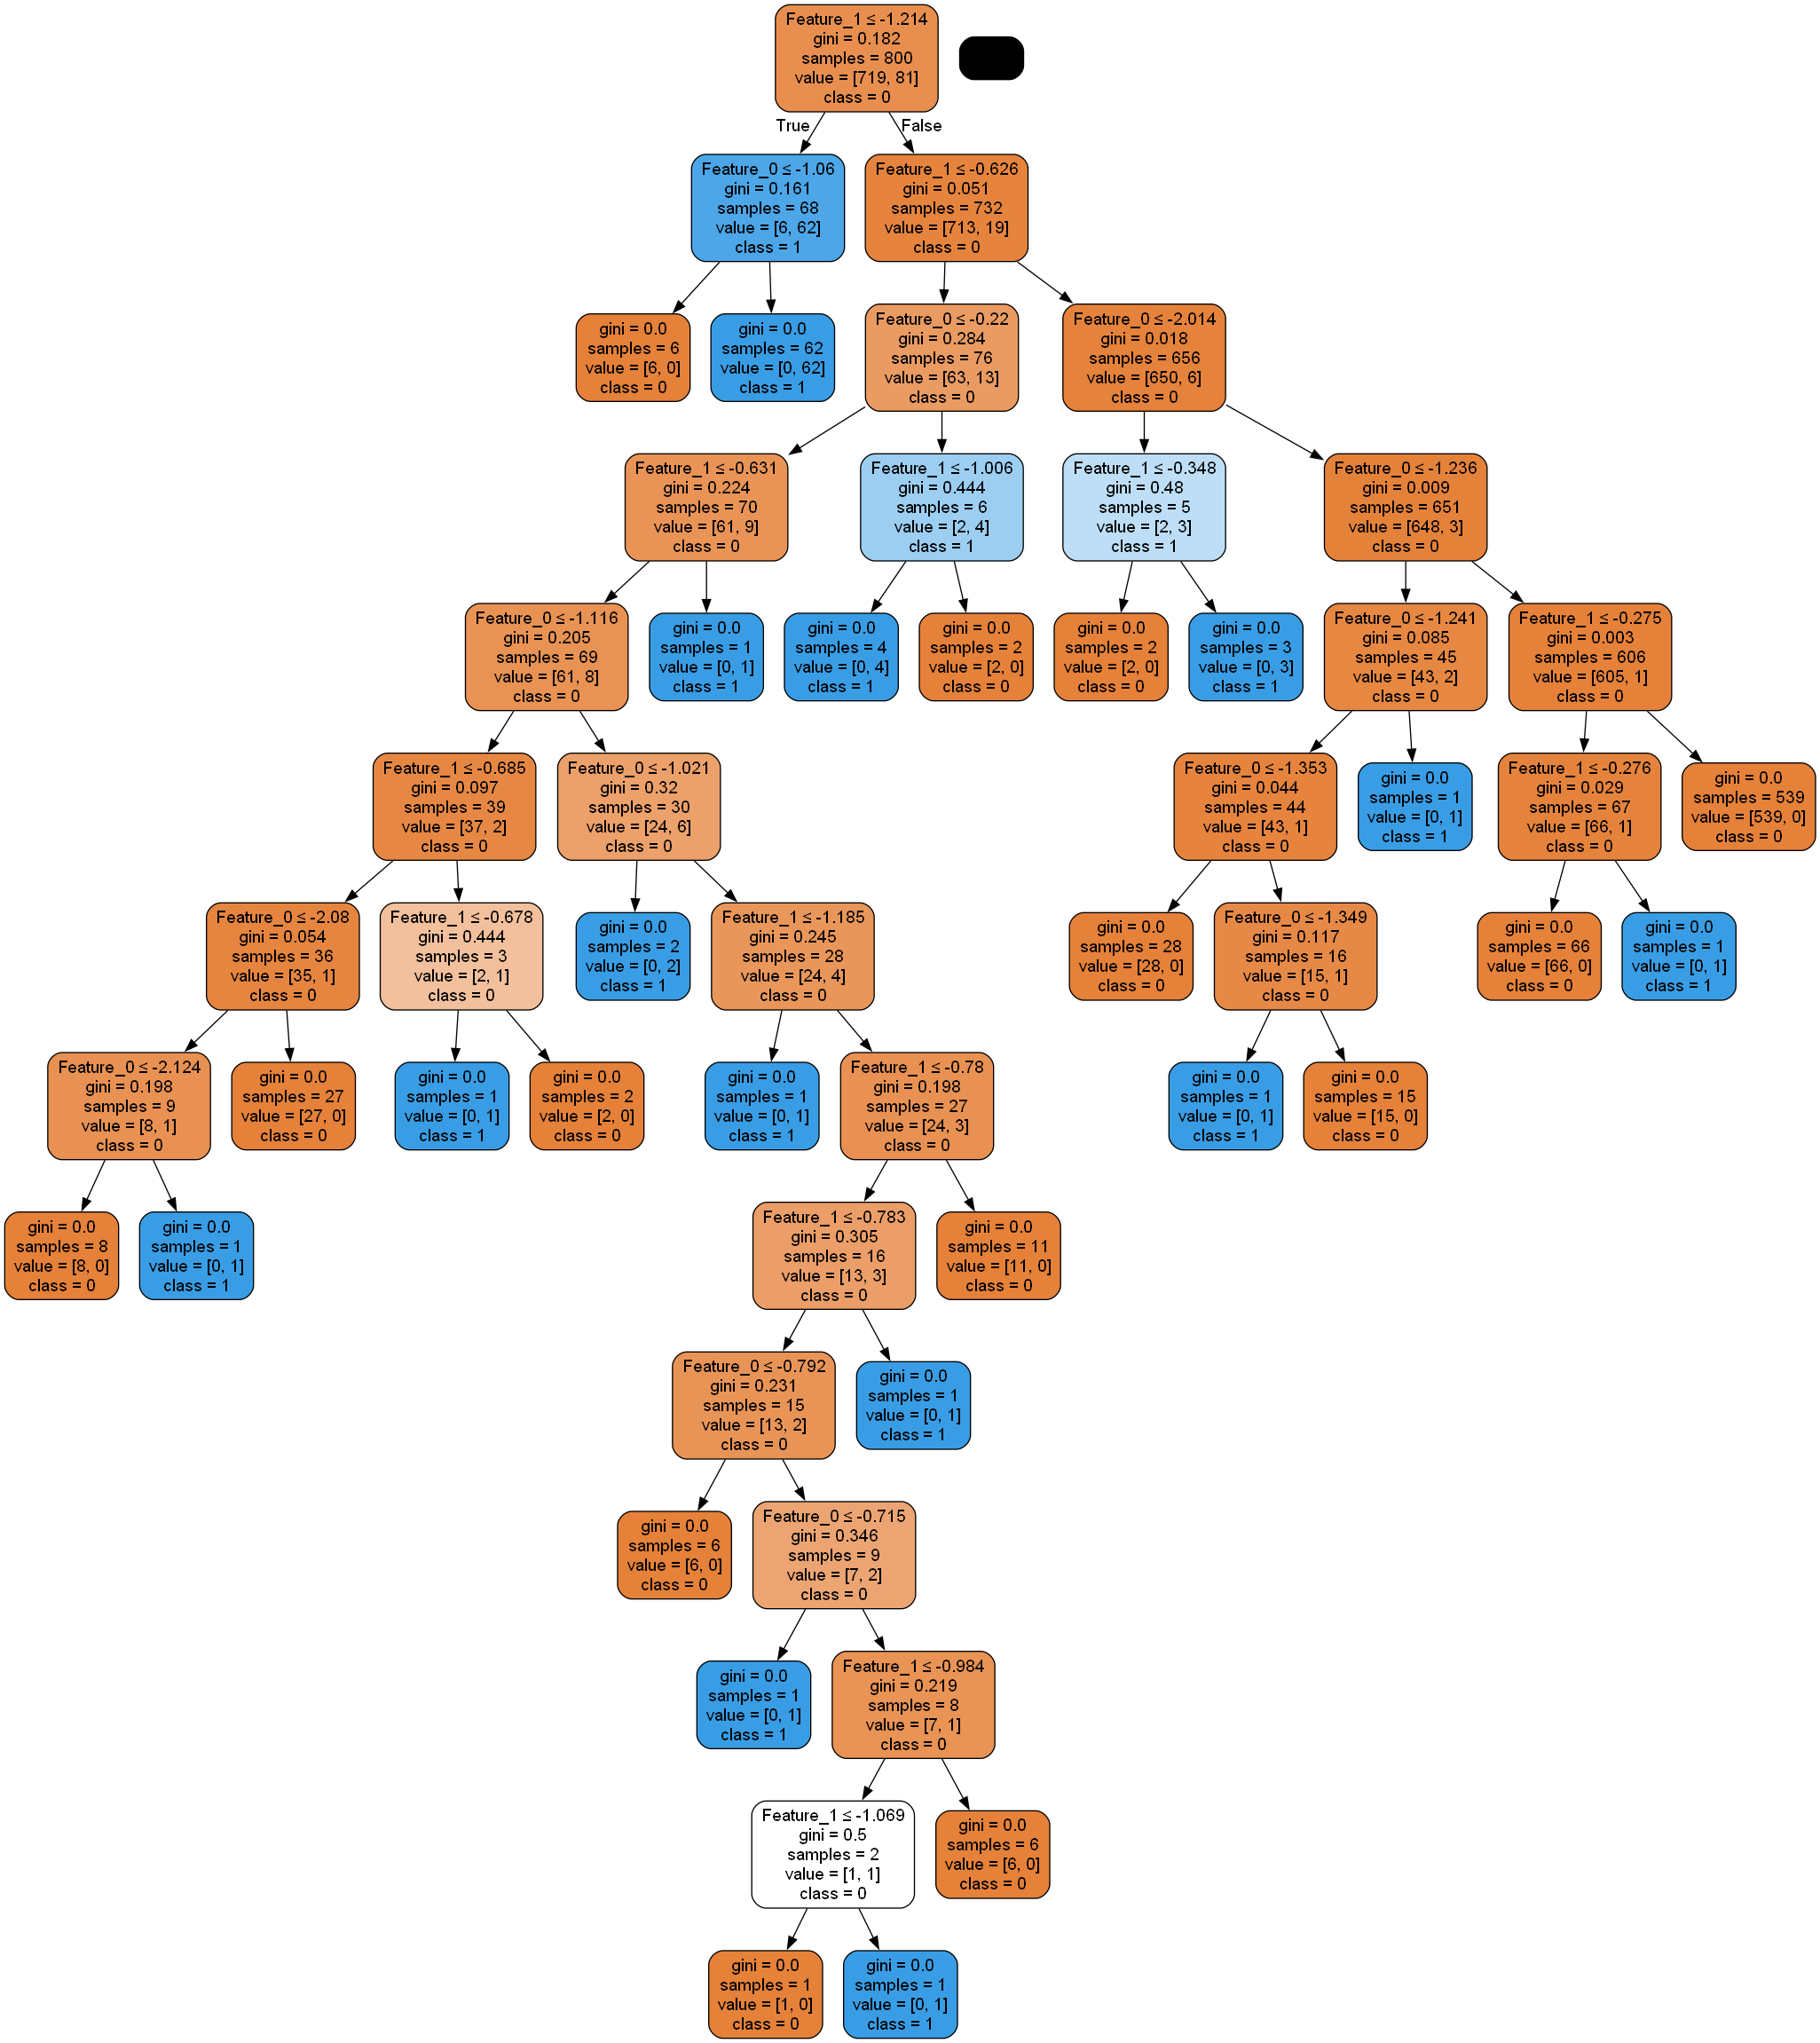

In [130]:
# Ensure X is a DataFrame
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])

# Ensure y is a NumPy array
if isinstance(y, pd.Series):
    y = y.to_numpy()
class_names = list(map(str, np.unique(y)))
dot_data = export_graphviz(
    clf,
    feature_names=X.columns,
    class_names = class_names,
    filled = True,
    rounded = True,
    special_characters = True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Diabetic_Decision_tree.png")
Image(graph.create_png())

In [131]:
y_pred = clf.predict(X_test)

In [132]:
DT_Accuracy = metrics.accuracy_score(y_test,y_pred)
Precision = metrics.precision_score(y_test,y_pred,average="weighted")
Recall = metrics.recall_score(y_test,y_pred,average="weighted")
F1_score = metrics.f1_score(y_test,y_pred,average="weighted")


print(f"Accuracy of decision tree:{DT_Accuracy:.2f}")
print(f"Precision score of decision tree:{Precision:.2f}")
print(f"Recall score of decision tree:{Recall:.2f}")
print(f"F1_score of decision tree:{F1_score:.2f}")

Accuracy of decision tree:0.96
Precision score of decision tree:0.97
Recall score of decision tree:0.96
F1_score of decision tree:0.97


In [ ]:
##SVM (Support Vector Machines) Algorithms

In [135]:
svm_classifier = SVC(kernel="linear",C=1)
svm_classifier.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [136]:
y_pred = svm_classifier.predict(X_test)

In [137]:
SVM_Accuracy = accuracy_score(y_test,y_pred)
SVM_Confusion_mat = confusion_matrix(y_test,y_pred)
SVM_Classification_rep = classification_report(y_test,y_pred)

In [138]:
print(f"Accuracy of SVM:{Accuracy:.2f}")
print("Confusion_mat of SVM:\n",Confusion_mat)
print("Classification Report of SVM:\n",Classification_rep)

Accuracy of SVM:0.99
Confusion_mat of SVM:
 [[182   0]
 [  2  16]]
Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       182
           1       1.00      0.89      0.94        18

    accuracy                           0.99       200
   macro avg       0.99      0.94      0.97       200
weighted avg       0.99      0.99      0.99       200



In [140]:
print("\ncomparision of models")
print(f"Decision tree Accuracy:{DT_Accuracy:.2f}")
print(f"Accuracy of logistic Regression:{Accuracy:2f}")
print(f"Accuracy of random forest: {rf_accuracy:.2f}")
print(f"Accuracy of gradient Boostung: {gb_accuracy:.2f}")
print(f"Accuracy of SVM:{Accuracy:.2f}")


comparision of models
Decission tree Accuracy:0.96
Accuracy of logistic Regression:0.990000
Accuracy of random forest: 0.98
Accuracy of gradient Boostung: 0.99
Accuracy of SVM:0.99


In [ ]:
###Summary
##In model used 5 alogrithms i.e LogisticRegression,Decision tree,RandomForest Gradient boosting & Support vector Machine.
## Accurcay of Logistic Regression,Gradient Boosting & Support Vector Machine is 0.99 that means it is overfitting.So, we will not consider that model as model is overfitting.
##comparsion of accuracy of Decision tree,Random Forest.As random forest accuracy is 0.98 but consider accuracy of decision tree i. 0.96 because if we consider random forest as per accuracy as it has trained & have as we trained  a student bookish knowledge & only having a bokish knowledge can be harmful.For eg,if a student have only bookish & he byheart everything instead of understanding.So,It can be problematic as undertanding & practical knowledge is not necessary.So, it is not suitable for our model.That's why we will consider Decision tree accuracy & Decision tree alagorithms is giving  beter accuracy i.e 0.96.
## Conclusion:Decision tree alogrithms is better for the Diabetic disease prediction models.